# Linear Regression
- 문제가 발생했을 때
    - 일반적인 상황
        - 규칙을 만들고 평가하고 오류를 분석한다
    - 데이터를 사용하는 상황
        - ML Al을 학습시키고, 평가하고, 오류를 분석한다.
        - 모델 스스로 데이터 기반으로 변화에 대응할 수 있음
        - 학습된 ML 모델을 관찰하다가 문제를 더 잘 이해하기도 함

## Basic of Regression

### 회귀
- 지도학습에서 출력값이 연속적일 때
- 입력 변수 x가 하나일 때
- 입출력 관계 그래프가 선형이면 선형식 회귀
- 예시
	- 만약 주택의 넓이, 가격이라는 데이터가 있고 주택가격을 예측하기
- 특성
    - 입력값
- label
    - 출력값
- h
	- hypothesis, 가설
	- 모델

### OLS
- Ordinary Linear Least Square
- ${\vec X} = ({\vec A^T}{\vec A})^{-1}{\vec A}^T{\vec Y}$
    - ${\vec A}$가 mXn 행렬일 때, m은 주어진 데이터의 갯수, n은 구해야 하는 방정식의 계수의 수와 상수 갯수의 합이다
    - $({\vec A^T}{\vec A})^{-1}$은 (nXm) X (mXn) = > nXn이고, ${\vec A}^T$은 nXm, ${\vec Y}$은 mX1 이므로, $({\vec A^T}{\vec A})^{-1}{\vec A}^T$은 (nXn) X (nXm) X (mX1) = > nX1 결과가 나온다
- $f(x)=ax+b$
- $E = \sum [y-f(x)]^2$
- 잔차 평가
	- residue
	- 잔차는 평균이 0인 정규분포를 따르는 것이어야 함
	- 잔차 평가는 잔차의 평균이 0이고, 정규분포를 따르는지 확인
    - 잔차가 정규 분포를 따른 다는 것은 정상성을 갖는 다는 것으로, 에러가 정상 범주 안에 속한다는 뜻, 아니라면 주어진 가설을 신뢰할 수 없음

### OLS 실습
- `import statsmodels.formula.api as smf`
    - 통계적 모델 함수를 제공함
    - R스타일 형식을 따왔으며, pandas의 df를 활용할 수 있음

- `lm_model변수 = smf.ols(formula = 'y ~ x', data = df).fit()`
    - ols
        - ordinary least squares
        - 범용최소제곱법
    - 'y ~ x'
        - y = ax + b 라는 의미
    - fit() 세부 내용을 학습시켜라...?
- `lm_model.params`
    - 학습시킨 모델의 매개변수 값들을 반환
    - 위 상황에서는 x의 기울기인 a와 y절편인 b를 표현

In [1]:
import pandas as pd

data = {'x': [1., 2., 3., 4., 5.],
        'y': [1., 3., 4., 6., 5.]}

df = pd.DataFrame(data)
df

x    y
0  1.0  1.0
1  2.0  3.0
2  3.0  4.0
3  4.0  6.0
4  5.0  5.0

In [2]:
import statsmodels.formula.api as smf

# 'y ~ x'
    # y = ax + b 라는 의미
lm_model = smf.ols(formula = 'y ~ x', data = df).fit()

In [3]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


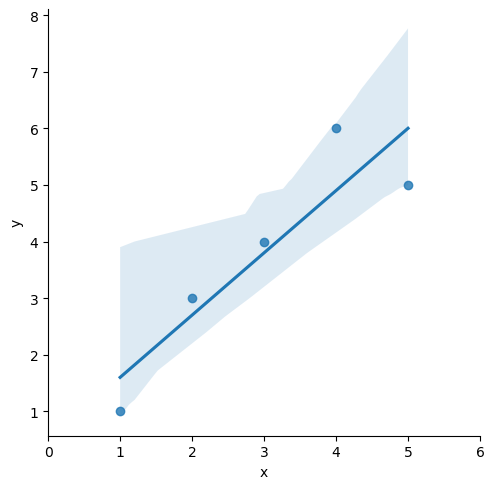

In [5]:
sns.lmplot(x = 'x',
           y = 'y',
           data = df)
plt.xlim([0, 6])
plt.show()

In [6]:
resid = lm_model.resid
print(resid)

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64


### 결정계수 계산
- **결정계수**
	- R-squared
	- $R^2={\sum^n_{i=1}({\hat y}-\mu)^2 \over \sum^n_{i=1}(y-\mu)^2}={ssR\over ssT}$
        - 분모
            - 예측값과 평균 사이 차이 합
        - 분모
            - 참값과 평균 사이 차이 합
	- y_hat, ${\hat y}$은 예측된 값
	- 예측값과 실제값(y)가 일치하면 결정계수는 1이됨
        - 결정계수가 높을 수록 좋은 모델
	- 통계는 독립변수를 많이 다루고, 머신러닝 엔지니어는 모델 성능을 많이 다룬다

In [7]:
import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()

print('공식을 직접 이용')
print(np.sum((yhat - mu)**2 / np.sum((y - mu)**2)))
print('\n')
print('함수를 이용')
print(lm_model.rsquared)

공식을 직접 이용
0.8175675675675673


함수를 이용
0.8175675675675675


C:\Users\UserK\AppData\Local\Temp\ipykernel_11524\623939520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color = 'red')


<Axes: ylabel='Density'>

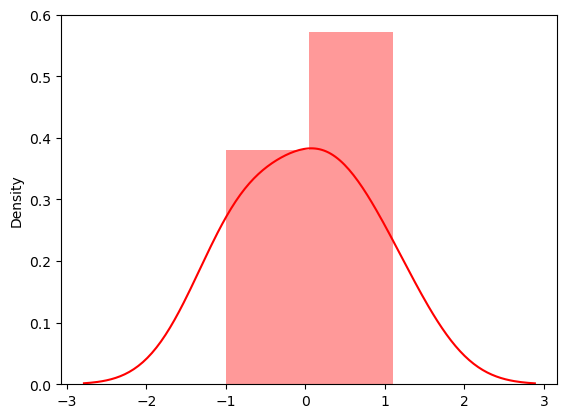

In [8]:
sns.distplot(resid, color = 'red')

## 통계적 회귀
- 통계에서 관심있게 보는 것
    - 나의 분포가 정규분포를 따르는가
    - 나의 데이터는 모집단을 잘 추정하는가
- 머신러닝에서 접근한 회귀는 많이 간소화됨
    - 결과에 관심
    - 예측을 어떻게 할 것인가
    - 데이터 보강방법과 다루는 방법에 초점
- `import statsmodels.api as sm`
    - 불러올 라이브러리
- `lm변수 = sm.OLS(y, X).fit()`
    - 사용하는 함수
- `lm변수.summary()`
    - 여러 변수 불러오기
- R`squared
    - 모형 적합도
    - y 분산을 각각 변수들이 약 99.8%로 설명할 수 있음
- Adj. R-squared
    - 독립변수가 여러 개인 다중회귀분석에서 사용
- Prob. F-Statistic
    - 회귀모형에 대한 통계적 유의미성 검정
    - 0.05이하라면 모집단에서도 의미가 있다고 볼 수 있음
- AIC
    - 낮을수록 좋음
    - 내가 만든 모델이 나의 데이터를 얼마나 잘 반영하는지 측정하는 도구
    - 내가 만든 모델이 원래 정보를 얼마나 손상시켰는가

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)

In [11]:
data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [12]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
data.drop(['Email', 'Address', 'Avatar'],
          axis = 1,
          inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


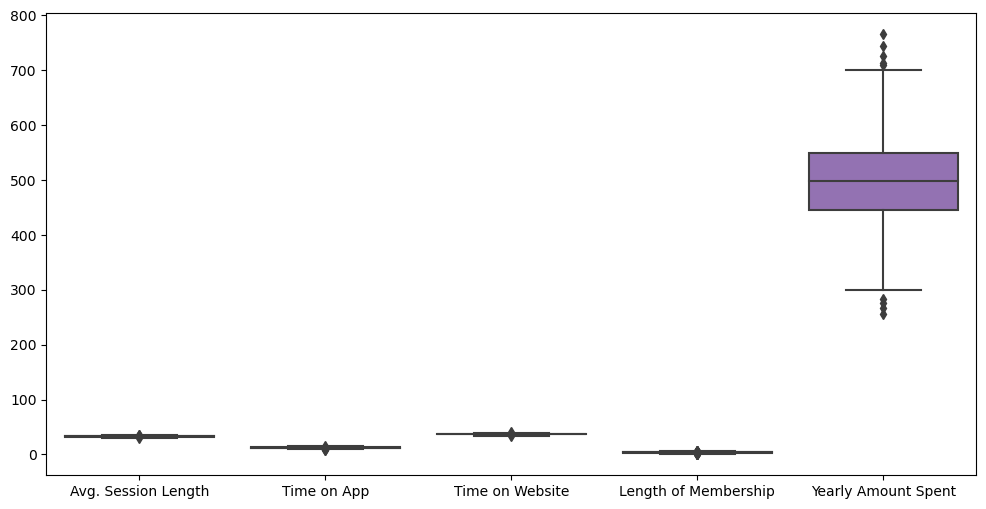

In [14]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data)
plt.show()

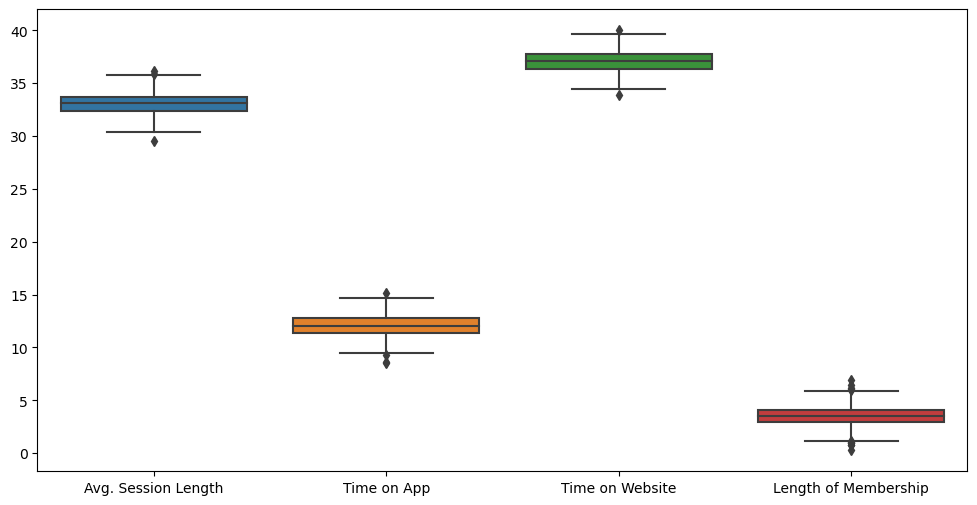

In [15]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data.iloc[:, :-1])
plt.show()

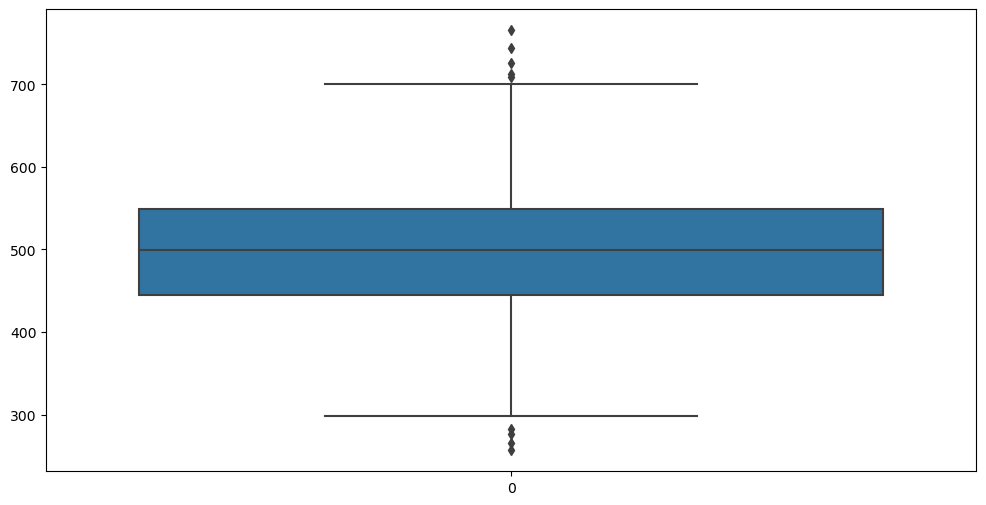

In [16]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data['Yearly Amount Spent'])
plt.show()

C:\ProgramData\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

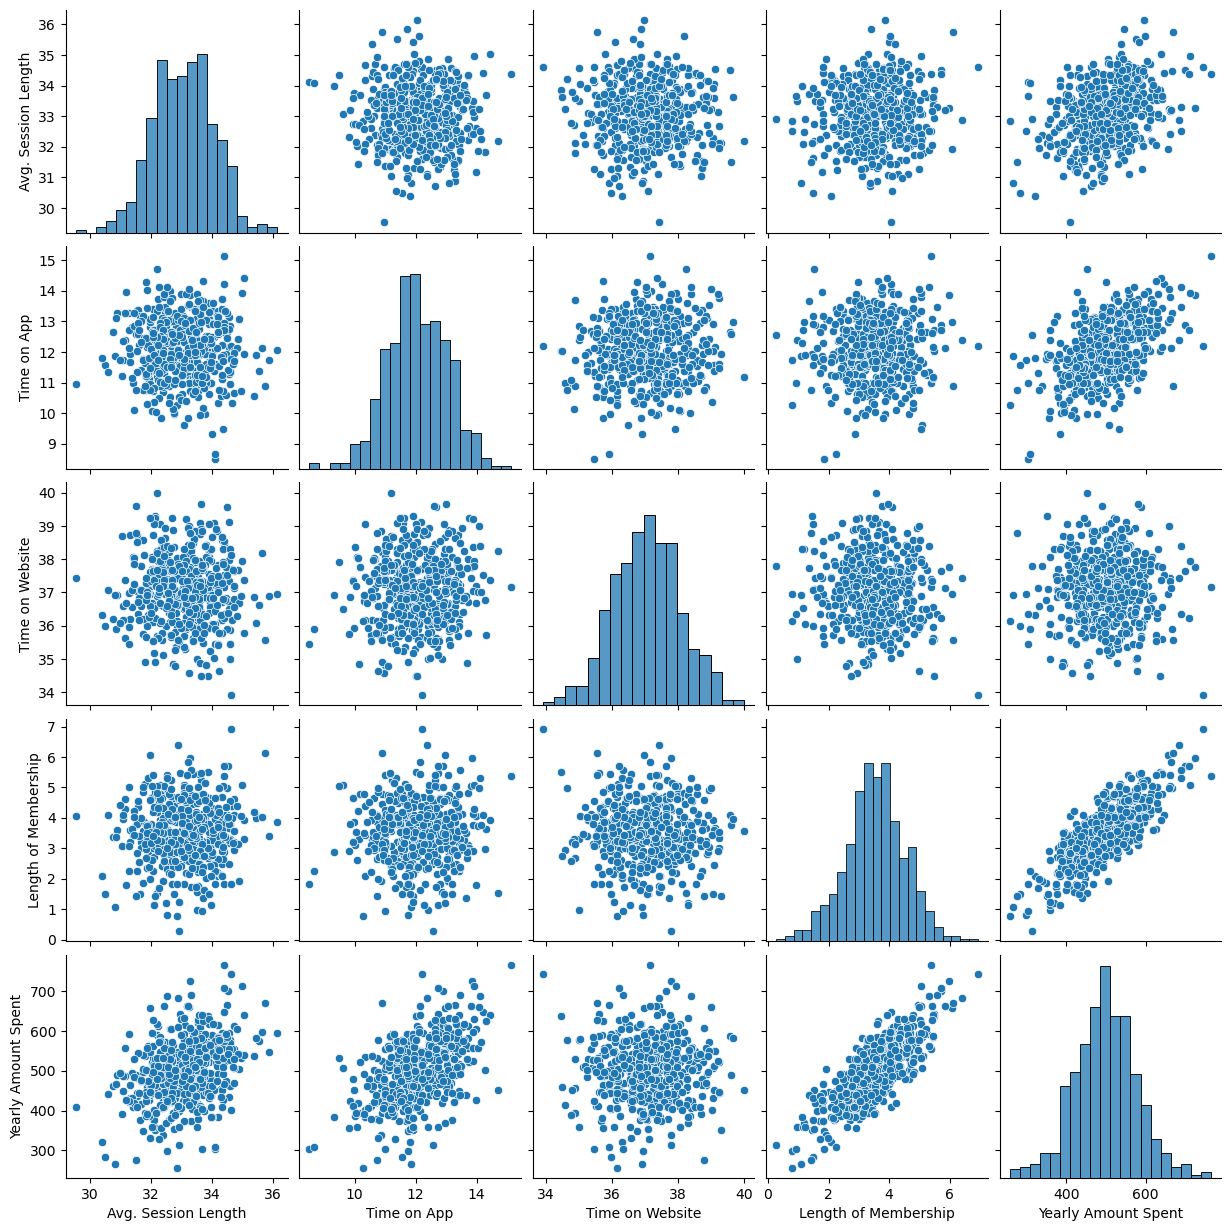

In [17]:
plt.figure(figsize = (12, 6))
sns.pairplot(data = data)
plt.show()

C:\ProgramData\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

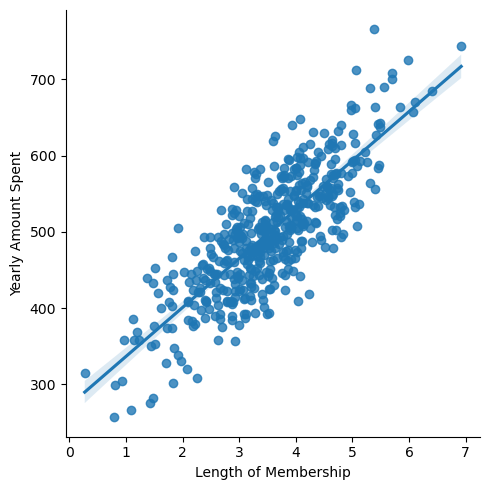

In [18]:
plt.figure(figsize = (12, 6))
sns.lmplot(x = 'Length of Membership',
           y = 'Yearly Amount Spent',
           data = data)
plt.show()

### 상관이 높은 특성만 가지고 통계적 회귀 살펴보기

In [19]:
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Thu, 12 Sep 2024   Prob (F-statistic):                        0.00
Time:                         22:54:33   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

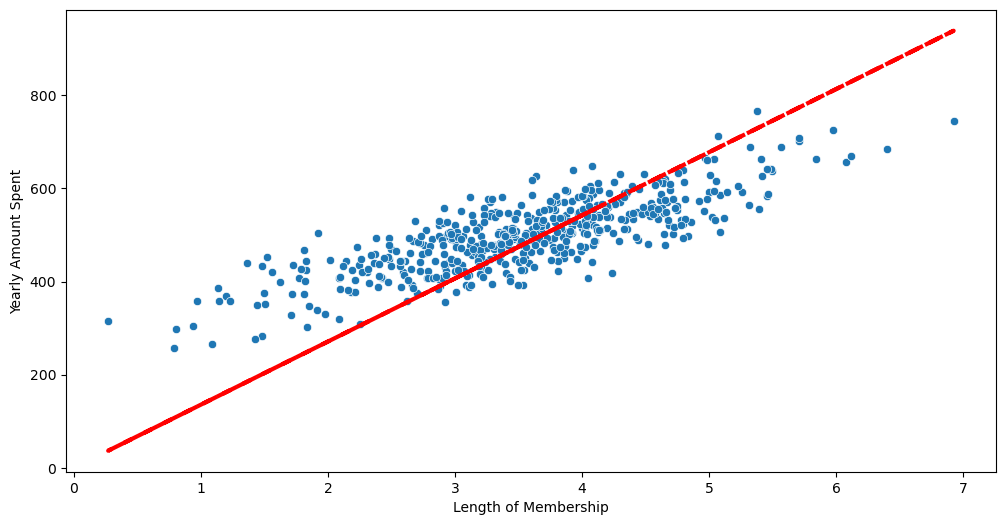

In [20]:
plt.figure(figsize = (12, 6))

pred = lm.predict(X)
sns.scatterplot(x = X,
                y = y)
plt.plot(X,
         pred, 
         'r',
         ls = 'dashed',
         lw = 3)
plt.show()

### 실제값과 예측값을 선 그래프로 표현
- 참값과 예측값이 y = x 그래프 선위에 모여있으면 좋은 것

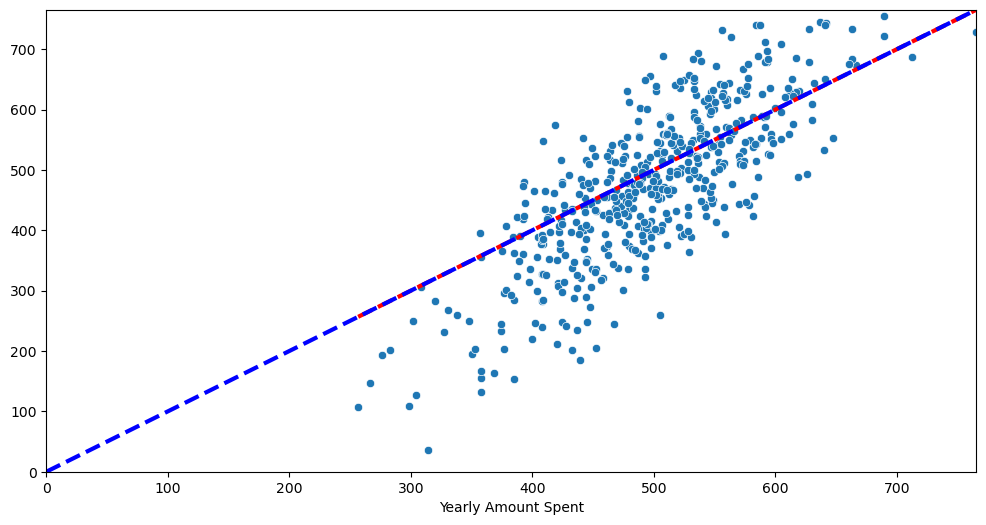

In [21]:
plt.figure(figsize = (12, 6))

sns.scatterplot(x = y,
                y = pred)
plt.plot([min(y), max(y)],
         [min(y), max(y)],
         'r',
         ls = 'dashed',
         lw = 3)
plt.plot([0, max(y)],
         [0, max(y)],
         'b',
         ls = 'dashed',
         lw = 3)
plt.axis([0, max(y), 0, max(y)])
plt.show()

### 상수항 넣어주기
- numpy에서 선언된 행렬에 r_ 혹은 c_를 이용하면 행 혹은 열을 쉽게 추가할 수 있다

In [22]:
X = np.c_[X, [1] * len(X)]
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [23]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Thu, 12 Sep 2024   Prob (F-statistic):          4.81e-117
Time:                         22:54:34   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

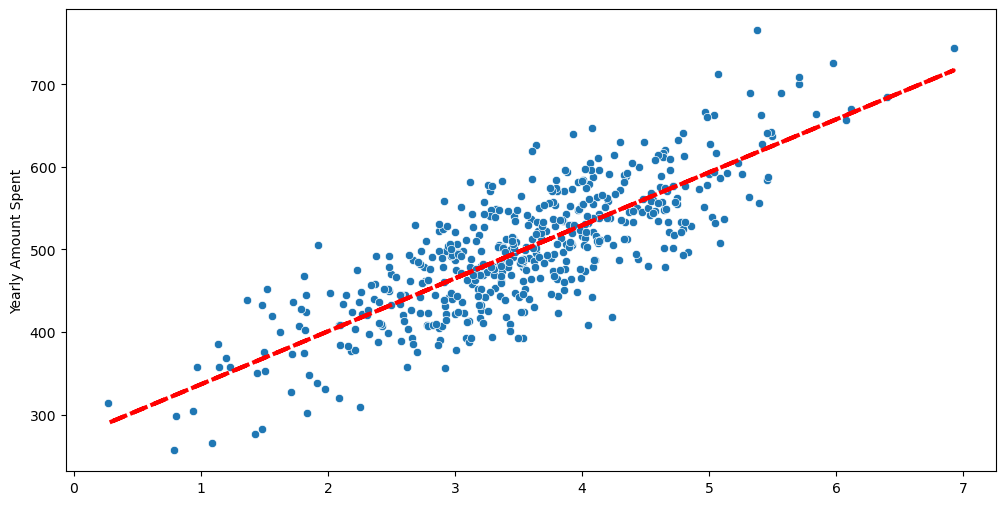

In [24]:
plt.figure(figsize = (12, 6))

pred = lm.predict(X)
sns.scatterplot(x = X[:, 0],
                y = y)
plt.plot(X[:, 0],
         pred, 
         'r',
         ls = 'dashed',
         lw = 3)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis = 1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 13
                                                   )
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.884e+04
Date:                 Thu, 12 Sep 2024   Prob (F-statistic):                        0.00
Time:                         22:54:34   Log-Likelihood:                         -1816.5
No. Observations:                  400   AIC:                                      3641.
Df Residuals:                      396   BIC:                                      3657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.0166      0.832     14.440      0.000      10.381      13.653
Time on App             35.2145      1.129     31.197      0.000      32.995      37.434
Time on Website        -14.4797      0.774    -18.715      0.000     -16.001     -12.959
Length of Membership    60.7148      1.151     52.742      0.000      58.452      62.978
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.571
Skew:                          -0.038   Prob(JB):                        0.752
Kurtosis:                       2.832   Cond. No.                         54.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 실제값과 예측값을 선 그래프로 표현
- 참값과 예측값이 y = x 그래프 선위에 모여있으면 좋은 것

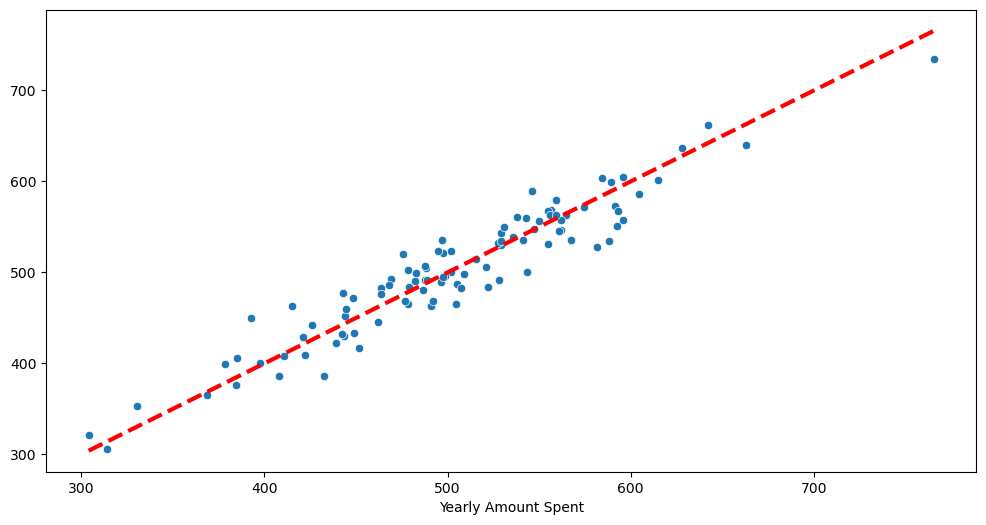

In [26]:
plt.figure(figsize = (12, 6))

pred = lm.predict(X_test)
sns.scatterplot(x = y_test,
                y = pred)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         'r',
         ls = 'dashed',
         lw = 3)
plt.show()

## Cost Function
- $h_\theta(x) = \theta_1 x + \theta_0$
- MSE
	- Mean Squared Error
	- $J(\theta) = {1 \over n}\{(h_\theta(a)-y_a)^2+(h_\theta(b)-y_b)^2+(h_\theta(c)-y_c)^2+...\}$
		- $h_\theta$: 예측값
		- $y_a$: x가 a일 때 y값, 참값
	- error를 표현하는 도구
		- $error = h_\theta(a)-y_a$
	- error가 작을수록, cost function이 작을수록 좋은 모델
		- cost function의 min value를 찾으면, 그것이 곧 우리의 모델이 된다고 말하는 이유
- Cost function 최솟값 찾기
	- 데이터와 모델이 완전히 일치하면
		- error = 0
		- $\theta$ = 1
	- 데이터와 모델이 조금 빗나가면
		- error = ~~
		- $\theta$ = ~~
	- 데이터와 모델이 완전히 빗나가면
		- error = ~~
		- $\theta$ = 0
	- **Gradient Descent**
		- 미분을 해서 어디로 갈지 정하는 것
		- $\theta:=\theta-\alpha{d\over dt}J_\theta(x)$
		- 학습률
			- Learning Rate, $\alpha$
			- 얼마만큼 $\theta$를 갱신할 것인지를 설정하는 값
			- 작으면 최솟값을 찾으러 가는 간격이 작게 됨
				- 여러번 갱신해야 하나 최솟값에 잘 도달할 수 있음

### Cost Function 구해보기

In [27]:
import numpy as np

np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

In [28]:
# symbolic 연산이 가능
import sympy as sym

theta = sym.Symbol('theta')
diff_th = sym.diff(38*theta**2 - 94*theta +62, theta)
diff_th

76*theta - 94

### Boston 집값 예측
- Carnegie Mellon Univ 에서 유지 관리함
- 1978년도에 만들어짐
- 회귀문제에 활용함
- 현재 문제가 있는 요소가 있다고 여겨져 dataset이 내려가있음, 따로 데이터를 구해 활용함
>`load_boston` has been removed from scikit-learn since version 1.2.

In [29]:
# from sklearn.datasets import load_boston

# boston = load_boston()
# print(boston.DESCR)

# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
#                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names = column_names)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [30]:
import pandas as pd

boston_pd = pd.read_csv('house_price.csv')

In [31]:
boston_pd.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  CAT.MEDV  
0  396.90   4.98  24.0         0  
1  396.90   9.14  21.6         0  
2  392.83   4.03  34.7         1  
3  394.63   2.94  33.4         1  
4  396.90   5.33  36.2         1

In [32]:
boston_pd['PRICE'] = boston_pd['MEDV']

In [33]:
boston_pd.drop(['MEDV', 'CAT.MEDV'], axis = 1, inplace = True)
boston_pd.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [34]:
import plotly.express as px

fig = px.histogram(boston_pd,
                   x = 'PRICE')
fig.show()

#### 상관계수 확인

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston_pd.corr().round(1)
corr_mat

CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
CRIM      1.0 -0.2    0.4  -0.1  0.4 -0.2  0.4 -0.4  0.6  0.6      0.3 -0.4   
ZN       -0.2  1.0   -0.5  -0.0 -0.5  0.3 -0.6  0.7 -0.3 -0.3     -0.4  0.2   
INDUS     0.4 -0.5    1.0   0.1  0.8 -0.4  0.6 -0.7  0.6  0.7      0.4 -0.4   
CHAS     -0.1 -0.0    0.1   1.0  0.1  0.1  0.1 -0.1 -0.0 -0.0     -0.1  0.0   
NOX       0.4 -0.5    0.8   0.1  1.0 -0.3  0.7 -0.8  0.6  0.7      0.2 -0.4   
RM       -0.2  0.3   -0.4   0.1 -0.3  1.0 -0.2  0.2 -0.2 -0.3     -0.4  0.1   
AGE       0.4 -0.6    0.6   0.1  0.7 -0.2  1.0 -0.7  0.5  0.5      0.3 -0.3   
DIS      -0.4  0.7   -0.7  -0.1 -0.8  0.2 -0.7  1.0 -0.5 -0.5     -0.2  0.3   
RAD       0.6 -0.3    0.6  -0.0  0.6 -0.2  0.5 -0.5  1.0  0.9      0.5 -0.4   
TAX       0.6 -0.3    0.7  -0.0  0.7 -0.3  0.5 -0.5  0.9  1.0      0.5 -0.4   
PTRATIO   0.3 -0.4    0.4  -0.1  0.2 -0.4  0.3 -0.2  0.5  0.5      1.0 -0.2   
B        -0.4  0.2   -0.4   0.0 -0.4  0.1 -0.3  0.3 -0.4 -0.4     -0.2  1.0   
LSTAT     0.5 -0.4    0.6  -0.1  0.6 -0.6  0.6 -0.5  0.5  0.5      0.4 -0.4   
PRICE    -0.4  0.4   -0.5   0.2 -0.4  0.7 -0.4  0.2 -0.4 -0.5     -0.5  0.3   

         LSTAT  PRICE  
CRIM       0.5   -0.4  
ZN        -0.4    0.4  
INDUS      0.6   -0.5  
CHAS      -0.1    0.2  
NOX        0.6   -0.4  
RM        -0.6    0.7  
AGE        0.6   -0.4  
DIS       -0.5    0.2  
RAD        0.5   -0.4  
TAX        0.5   -0.5  
PTRATIO    0.4   -0.5  
B         -0.4    0.3  
LSTAT      1.0   -0.7  
PRICE     -0.7    1.0

In [36]:
corr_mat[corr_mat > 0.5]

CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
CRIM      1.0  NaN    NaN   NaN  NaN  NaN  NaN  NaN  0.6  0.6      NaN  NaN   
ZN        NaN  1.0    NaN   NaN  NaN  NaN  NaN  0.7  NaN  NaN      NaN  NaN   
INDUS     NaN  NaN    1.0   NaN  0.8  NaN  0.6  NaN  0.6  0.7      NaN  NaN   
CHAS      NaN  NaN    NaN   1.0  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
NOX       NaN  NaN    0.8   NaN  1.0  NaN  0.7  NaN  0.6  0.7      NaN  NaN   
RM        NaN  NaN    NaN   NaN  NaN  1.0  NaN  NaN  NaN  NaN      NaN  NaN   
AGE       NaN  NaN    0.6   NaN  0.7  NaN  1.0  NaN  NaN  NaN      NaN  NaN   
DIS       NaN  0.7    NaN   NaN  NaN  NaN  NaN  1.0  NaN  NaN      NaN  NaN   
RAD       0.6  NaN    0.6   NaN  0.6  NaN  NaN  NaN  1.0  0.9      NaN  NaN   
TAX       0.6  NaN    0.7   NaN  0.7  NaN  NaN  NaN  0.9  1.0      NaN  NaN   
PTRATIO   NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      1.0  NaN   
B         NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  1.0   
LSTAT     NaN  NaN    0.6   NaN  0.6  NaN  0.6  NaN  NaN  NaN      NaN  NaN   
PRICE     NaN  NaN    NaN   NaN  NaN  0.7  NaN  NaN  NaN  NaN      NaN  NaN   

         LSTAT  PRICE  
CRIM       NaN    NaN  
ZN         NaN    NaN  
INDUS      0.6    NaN  
CHAS       NaN    NaN  
NOX        0.6    NaN  
RM         NaN    0.7  
AGE        0.6    NaN  
DIS        NaN    NaN  
RAD        NaN    NaN  
TAX        NaN    NaN  
PTRATIO    NaN    NaN  
B          NaN    NaN  
LSTAT      1.0    NaN  
PRICE      NaN    1.0

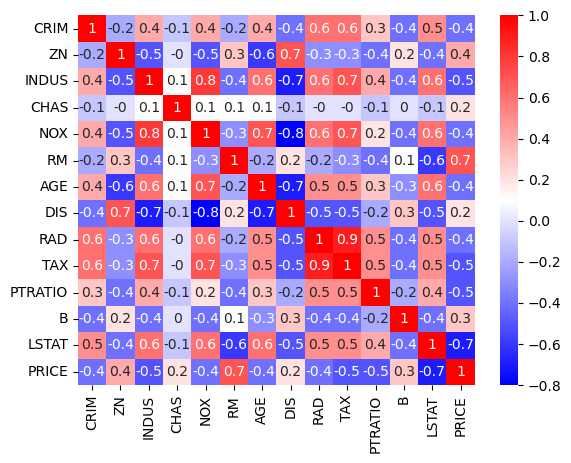

In [37]:
sns.heatmap(data = corr_mat,
            annot = True,
            cmap = 'bwr');

- Price, RM(방의 수), LSTAT(저소득층 인구)가 높은 상관관계를 보임
- 저소득층 인구가 낮을수록, 방의 갯수가 많을수록 집 값이 높아짐?

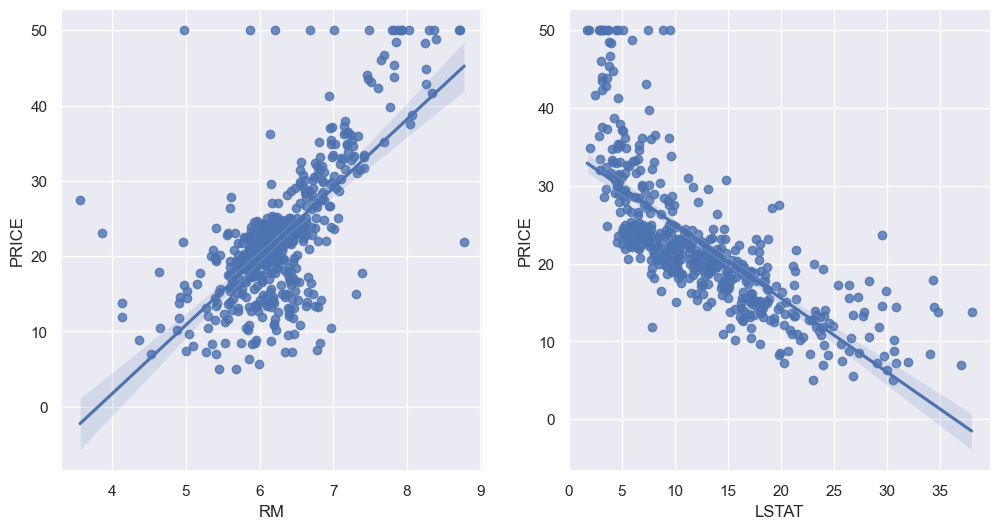

In [38]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize': (12, 6)})
fig, ax = plt.subplots(ncols = 2)
sns.regplot(x = 'RM',
            y = 'PRICE',
            data = boston_pd,
            ax = ax[0])

sns.regplot(x = 'LSTAT',
            y = 'PRICE',
            data = boston_pd,
            ax = ax[1])

plt.show()

- 어떤 특성이 가설에 너무나도 당연하게 영향을 미치는 요소인 것은 아닌지 확인해야 함
- 당연한 이야기를 하는 것에 데이터 분석을 이용하는 과정이 필요한가?
- 추가 데이터 수집이 필요한 것은 아닌지 확인해야 함

In [39]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE',
                   axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 13)

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

# 모델 평가 지수가 따로 없으므로 아래 값을 이용함
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.642806069019824
RMSE of Test Data:  4.931352584146716


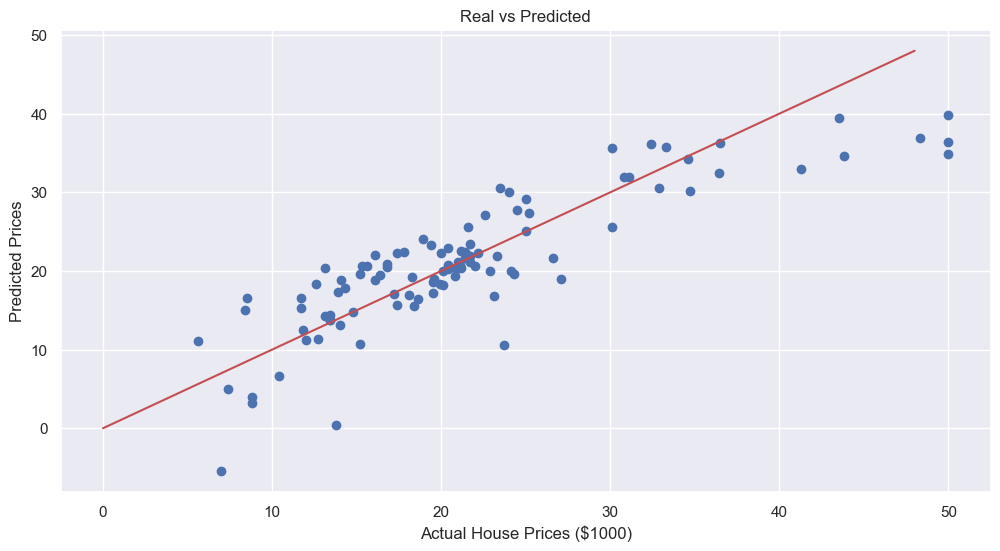

In [42]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0, 48], [0, 48], 'r')
plt.show()

#### 특정 컬럼을 빼보고 성능 확인하기

In [43]:
X = boston_pd.drop(['PRICE', 'LSTAT'],
                   axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 13)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [44]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  5.165137874244864
RMSE of Test Data:  5.2955950325971655


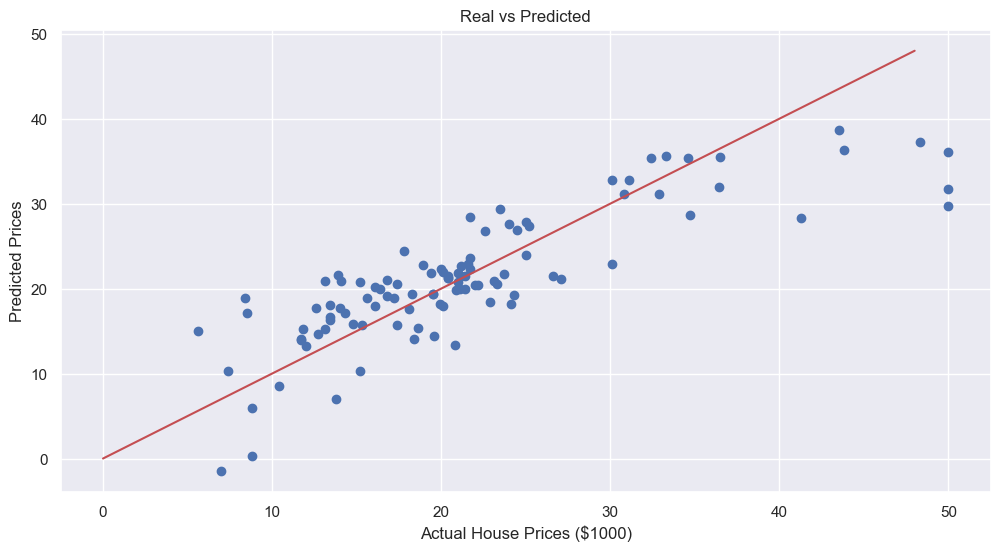

In [45]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0, 48], [0, 48], 'r')
plt.show()

- 결과값을 보고 바로 판단할 수 없지만, 결과를 두고 논의가 필요함